# Create data and import libraries 

- This is 05:01 IST 26-04-2-25
- I wake up early in the morning
- Excited to apply the gradient descent 
- That i learn next night.
- So Let's begin ...👨‍💻🙌🔥

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
from sklearn import set_config
set_config(display='diagram')

In [15]:
X, y = make_regression(
    n_samples=4, # 4 rows
    n_features=1, # input column 1
    n_informative= 1, # no of feature
    n_targets=1, # output column 1
    noise= 80, # create some noise
    random_state=13,
)

In [16]:
# input column with 4 samples 
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [17]:
# output column
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

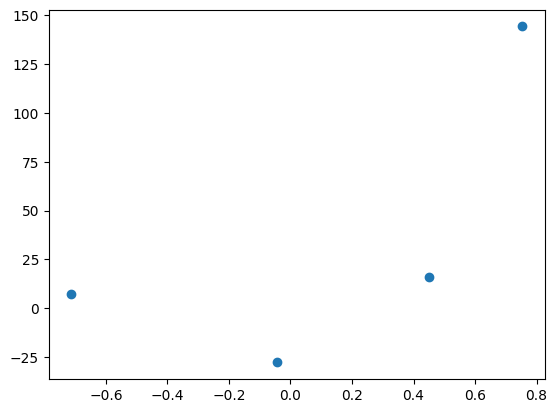

In [18]:
# see the data points
plt.scatter(X, y)

# Apply linear regression

In [22]:
reg = LinearRegression().fit(X, y)
reg

LinearRegression()

In [20]:
reg.coef_

array([78.35063668])

In [21]:
reg.intercept_

np.float64(26.15963284313262)

## See that linear regression line

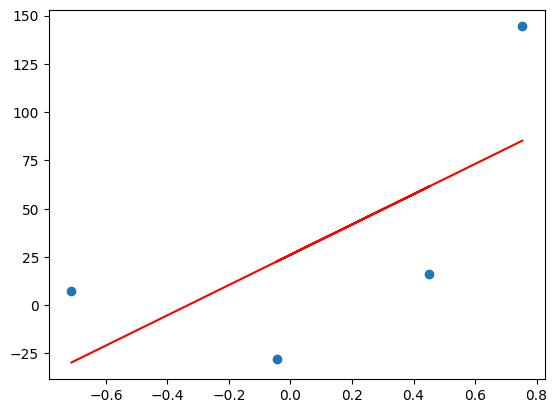

In [ ]:
# This is the prediction line 
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.show()

# Let's apply Gradient Descent and see what happens

In [25]:
# this is slope of the regression/red line
reg.coef_

array([78.35063668])

In [34]:
# let's assume we knew the m that is m = 78.35
# but we don't know b 
# so we take the random variable 
# let take that is b = 100

# y = mx + b
# ((78.35 * X) + 100)

# now our prediction line is (Assuming)
y_pred = ((78.35 * X) + 0).reshape(4)

In [35]:
# for each 4 point of X it predict a y
# that is 
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

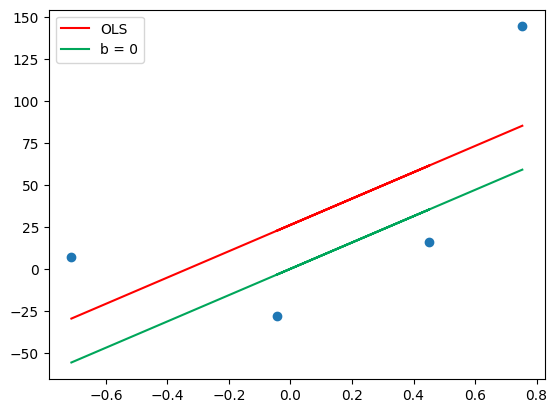

In [37]:
# Now see what we predict thought our equation
# Red line is actual predict that create by sklern 
# Green line is our prediction line create by this equation ((78.35 * X) + 100)
# OLS -> Ordinary Least Square method


plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='#00a65a', label='b = 0')
plt.legend()
plt.show()

# Introduce the Learning Rate & Step Size

In [52]:
# ravel() helps to convert 
print(f"Original Shape {X.shape} -> {X.ravel().shape}")

Original Shape (4, 1) -> (4,)


**Learning Rate :**
- Very Simple just like human learning speed 
- How you data can learn from the points we provided
  
**Loss Slope :**
- This loss_slope came from the derivative of the loss function
- Due to we know the m 
- So we do partial derivative of b with respect to m
- -2 * summation(y - mx -b)

**Step Size :** 
- After what step we take one after another
- After choosing the lr 
- Then we decide the step size 
- This we calculate by
- b = b - lr * loss_slope


## Iteration 1

In [66]:
m = 78.35 # we know
b = 100 # random number we assume
loss_slope = -2 * np.sum(y - (m * X.ravel()) - b)
loss_slope

np.float64(590.7223659179078)

In [67]:
# let's take our learning rate is 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

np.float64(59.072236591790784)

In [68]:
# Calculate the y_pred1 for new equation
y_pred1 = ((78.35 * X) + b).reshape(4)
y_pred1

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

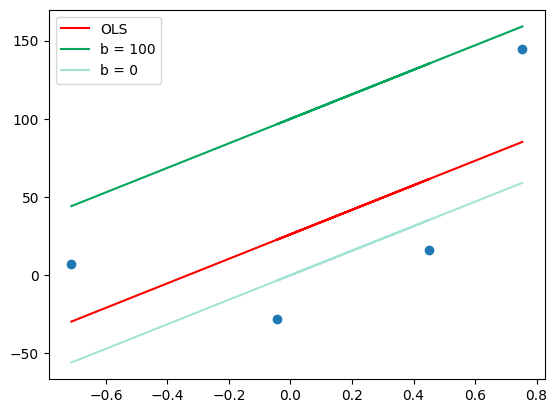

In [69]:
# Draw what we get

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

**About the Graph :**
- Light green is b = 0
- Dark green is b = 100

## Iteration 2

In [70]:
loss_slope = -2 * np.sum(y - (m * X.ravel())- b)
loss_slope

np.float64(590.7223659179078)

In [71]:
# again Calculate the step size
step_size = loss_slope * lr
step_size

np.float64(59.072236591790784)

In [72]:
# update the b acc. to the new step size
b = b - step_size
b

np.float64(40.927763408209216)

In [73]:
# again prediction based on the new b
y_pred2 = ((78.35 * X) + b).reshape(4)
y_pred2

array([-14.88804496,  76.32726015,  37.44094722,  99.98535918])

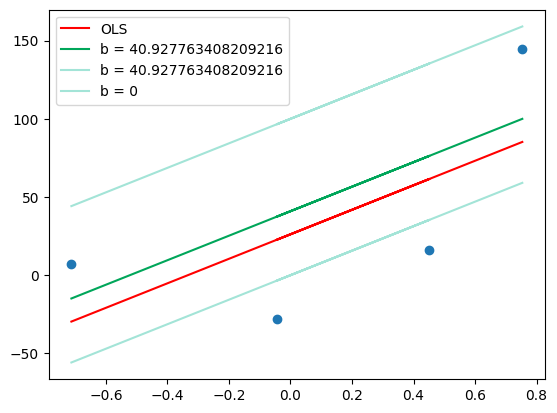

In [74]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

## Iteration 3

In [75]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(118.14447318358157)

In [76]:
step_size = loss_slope*lr
step_size

np.float64(11.814447318358157)

In [77]:
b = b - step_size
b

np.float64(29.11331608985106)

In [78]:
y_pred3 = ((78.35 * X) + b).reshape(4)


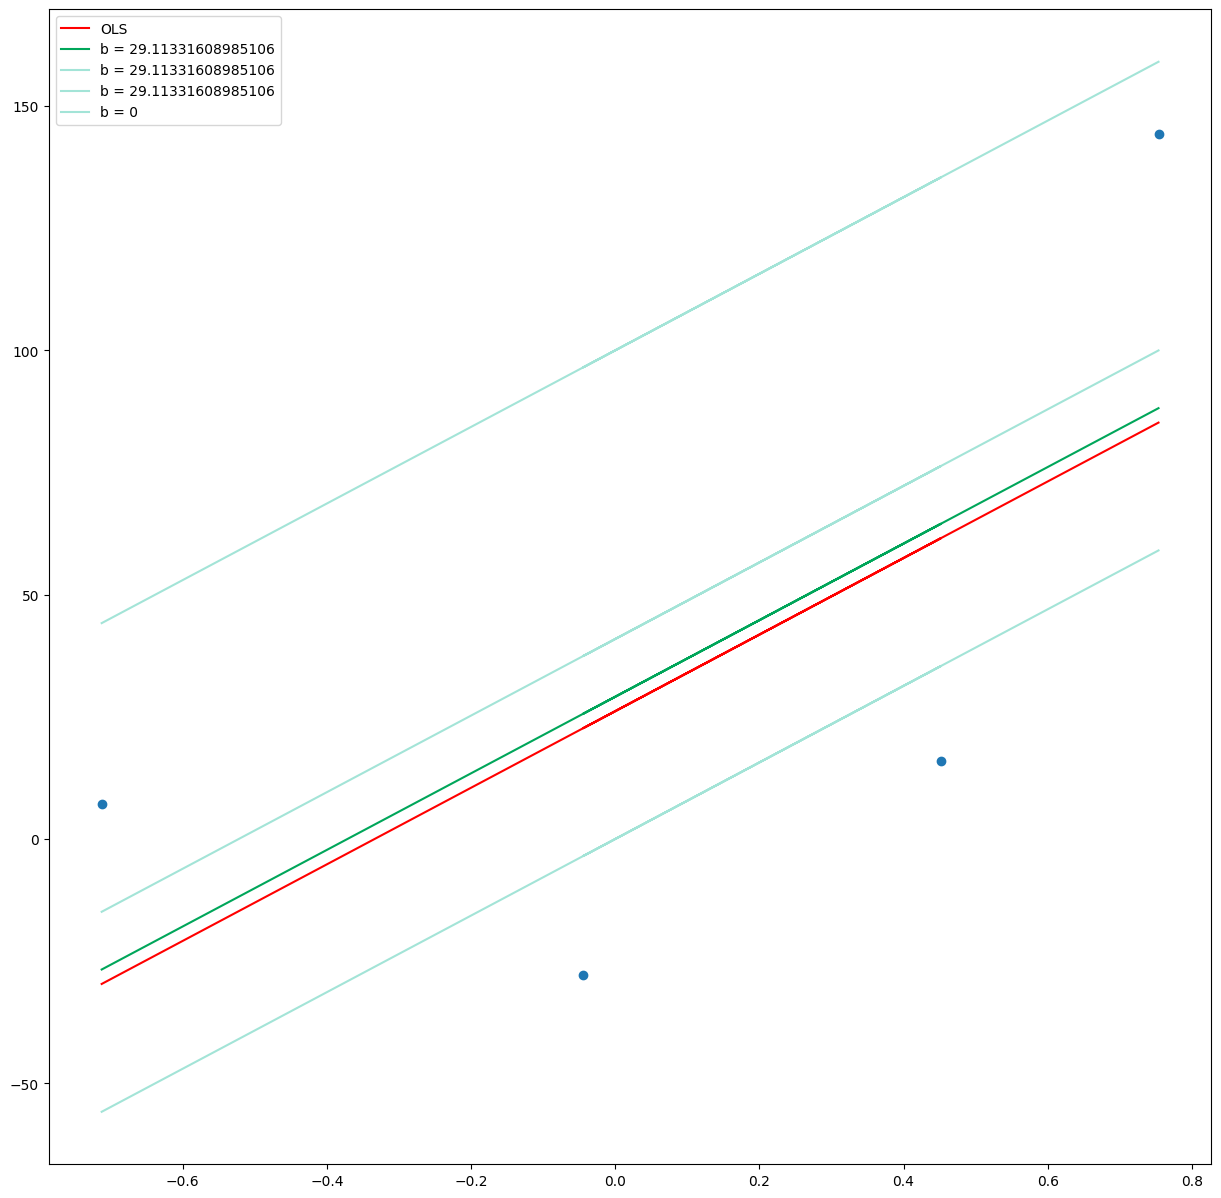

In [80]:
# See where we reach
plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

# Understand what is Over fitting and Under Fitting 

**Over fitting :** If learning rate is too big it does not reach the actual regression line it may jump the actual line.
**Under Fitting :** If learning rate is too small it does not reach the actual regression line.

`Action Point :`Choosing the right learning rate is crucial.

- After one or few step this over lap the points

# Introduce the `epochs`

- Simple If we do this iteration in manualy then it take time and human efforts
- If we do in loop it called epochs.

In [110]:
def optimal_regression_line(m:float, b: float, learning_rate: float, epochs: int, show_legend=False) -> None:
    
    plt.figure(figsize=(17, 8))
    plt.title("Random line to Regression line")
    
    for i in range(epochs):
        loss_slope = -2 * np.sum(y - (m*X.ravel()) - b)
        b = b - (learning_rate * loss_slope)
        
        y_pred_loop = m * X + b
        
        plt.plot(X, y_pred_loop, label="b_{} = {}".format(i, b))
        
        if show_legend == True:
            plt.legend()    
        
    plt.scatter(X, y)

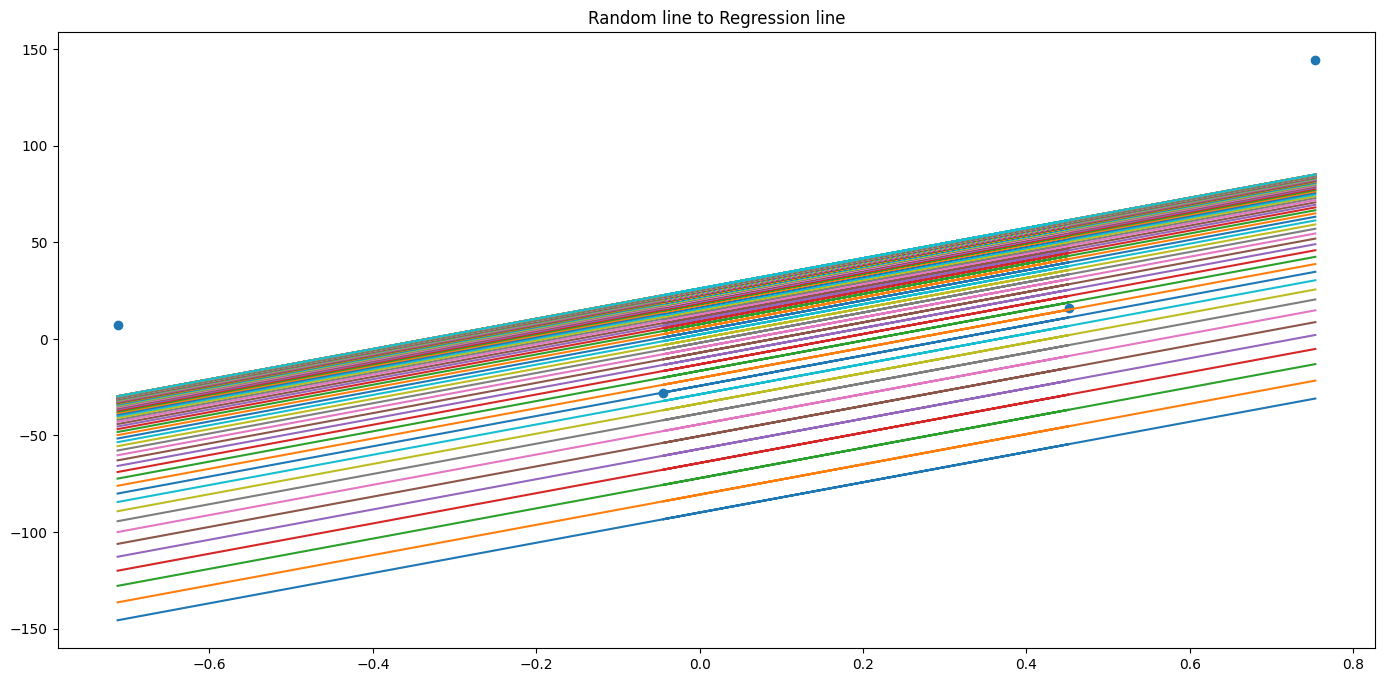

In [111]:
optimal_regression_line(m=78.35, b=-100, learning_rate=0.01, epochs=100)

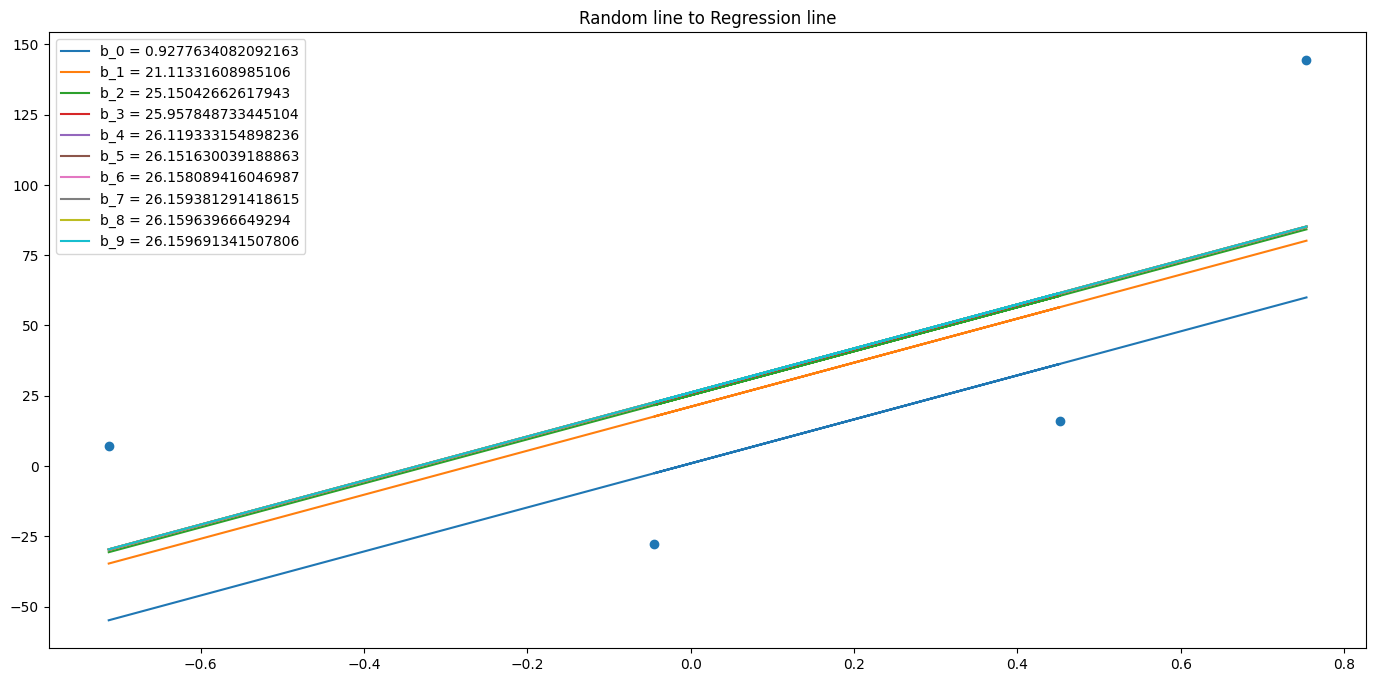

In [112]:
optimal_regression_line(m=78.35, b=-100, learning_rate=0.1, epochs=10, show_legend=True)